# Causal Analysis of Osteoporosis Dataset

## Introduction

This Jupyter Notebook presents the detailed steps undertaken for the causal analysis of an osteoporosis dataset. The analysis aims to identify the significant factors contributing to osteoporosis and to explore the interactions between key variables. The steps follow a systematic approach, including data preprocessing, exploratory data analysis (EDA), statistical testing, and causal diagramming.

### Objectives
1. To explore and preprocess the dataset, ensuring data quality and consistency.
2. To analyze the relationships between demographic, lifestyle, and medical factors with osteoporosis.
3. To construct and enhance causal diagrams (DAGs) that illustrate the relationships and interactions between variables.
4. To provide insights that can inform preventive strategies for osteoporosis.

### Structure of the Notebook
1. **Data Exploration and Preprocessing**:
   - Overview of the dataset.
   - Handling missing values and verifying data quality.
2. **Exploratory Data Analysis (EDA)**:
   - Visualizations to understand distributions and relationships.
   - Correlation analysis and outlier detection.
3. **Statistical Testing**:
   - Chi-Square tests to assess the statistical significance of categorical variables.
4. **Causal Diagramming**:
   - Construction of initial and enhanced DAGs to visualize causal relationships.
   - Integration of interaction terms to refine the analysis.


### Step 1: Data Exploration

In [224]:
import pandas as pd

file_path = 'Osteoporosis.csv'
data = pd.read_csv(file_path)

In [225]:
data.shape

(1958, 16)

In [226]:
print("Dataset Preview:")
data.head()

Dataset Preview:


,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidm,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [227]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int6

Text(0, 0.5, 'Sample Number')

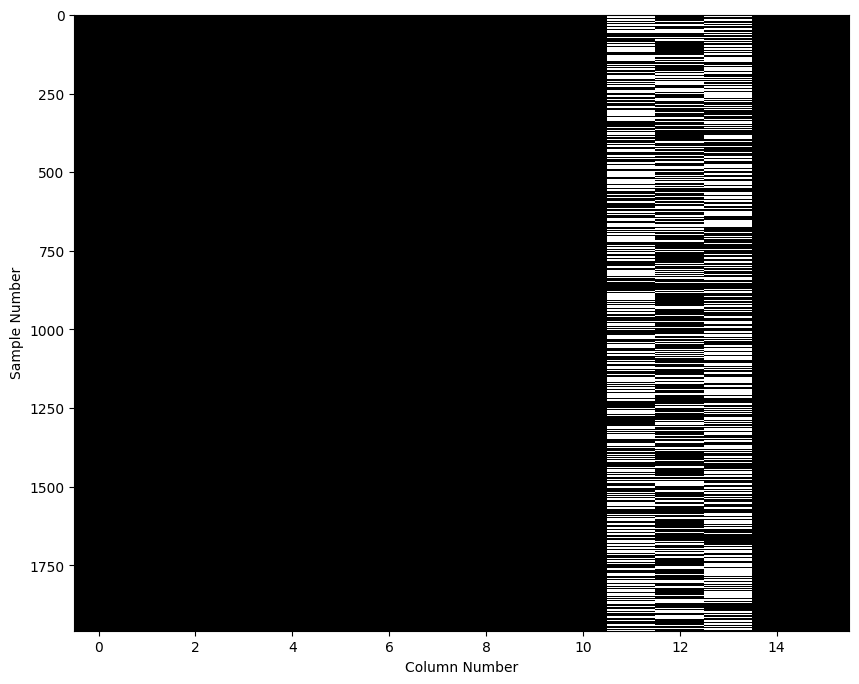

In [228]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

In [229]:
print("Missing Values:")
data.isnull().sum()

Missing Values:


Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

**First**, I'll create a table that will make it easier for me to understand what each column means and what type it is, so I can easily refer to it when needed.


| **Column Name**              | **Description**                                                        | **Data Type**       |
|------------------------------|------------------------------------------------------------------------|---------------------|
| **Id**                       | A unique identifier for each individual in the study.                  | Integer (int64)     |
| **Age**                      | The age of the individual.                                             | Integer (int64)     |
| **Gender**                   | The gender of the individual (Male/Female).                           | Text (object)       |
| **Hormonal Changes**         | Hormonal status (e.g., Normal, Postmenopausal, etc.).                  | Text (object)       |
| **Family History**           | Presence of a family history of osteoporosis (Yes/No).                | Text (object)       |
| **Race/Ethnicity**           | The racial or ethnic background (e.g., Asian, Caucasian, African).    | Text (object)       |
| **Body Weight**              | The weight status (e.g., Underweight, Normal).                        | Text (object)       |
| **Calcium Intake**           | The level of calcium intake (e.g., Low, Adequate).                    | Text (object)       |
| **Vitamin D Intake**         | The level of Vitamin D intake (e.g., Sufficient, Insufficient).       | Text (object)       |
| **Physical Activity**        | The level of physical activity (e.g., Active, Sedentary).             | Text (object)       |
| **Smoking**                  | Smoking status (Yes/No).                                              | Text (object)       |
| **Alcohol Consumption**      | The level of alcohol consumption (e.g., Low, Moderate, High).         | Text (object)       |
| **Medical Conditions**       | Medical conditions (e.g., Rheumatoid Arthritis, Hyperthyroidism).     | Text (object)       |
| **Medications**              | Medications used (e.g., Corticosteroids).                             | Text (object)       |
| **Prior Fractures**          | History of prior fractures (Yes/No).                                  | Text (object)       |
| **Osteoporosis**             | Indicator of osteoporosis (1 = Diagnosed, 0 = Not Diagnosed).         | Integer (int64)     |


**Second, what do we observe from data exploration?**
1. Number of rows and columns:
We have 1958 rows and 16 columns.
2. Data types:
The columns contain data of type text (Object) and numbers (int64).
3. Missing values:
We notice that we have columns with missing values..
- The alcohol consumption column contains 988 missing values.
- The medical conditions column contains 647 missing values.
- The medications column contains 985 missing values.<br>
We also notice that the number of missing values ​​is large, such as the first column (alcohol consumption) contains 988 missing values, which means that if we adopt the deletion method, we will lose almost half of the data! (988/1958).
This, from what I see, will lead to reducing the number of samples available for analysis and we will lose the analytical meaning of the data or weaken it. We also notice that they are all text columns, so **I will treat the missing data using the most frequent data (mod)**

### Step 2: Handling missing values

In [230]:
for column in ['Alcohol Consumption', 'Medical Conditions', 'Medications']:
    data[column].fillna(data[column].mode()[0], inplace=True)

C:\Users\sra28\AppData\Local\Temp\ipykernel_16052\3079379383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


Text(0, 0.5, 'Sample Number')

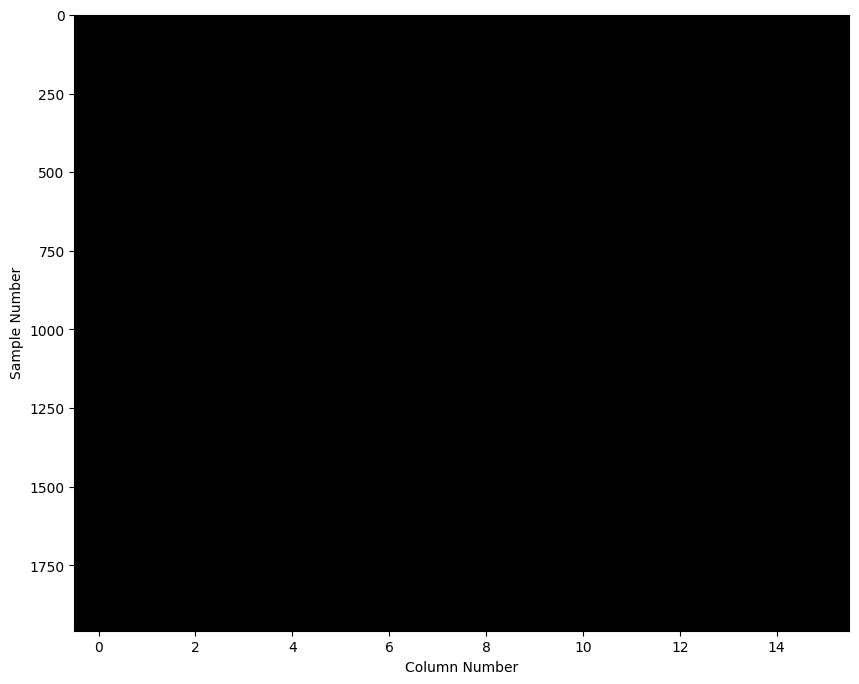

In [231]:
plt.figure(figsize=(10, 8))
plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

In [232]:
print("Missing Values:")
data.isnull().sum()

Missing Values:


Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

### Step 3: Categorical Data Cleaning


This section focuses on refining categorical data for consistency and analysis. It includes checking value counts, standardizing inconsistent entries (e.g., "Suffi" to "Sufficient"), removing invalid data, and using regex to group similar patterns (e.g., "Moderate" for alcohol consumption). Categories like race/ethnicity are clarified, and unique values are reviewed to ensure alignment. These steps ensure a clean and reliable dataset for accurate analysis.

In [233]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    print(f"Value counts for '{column}':")
    print(data[column].value_counts())
    print("\n")

Value counts for 'Gender':
Gender
Male      992
Female    966
Name: count, dtype: int64


Value counts for 'Hormonal Changes':
Hormonal Changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64


Value counts for 'Family History':
Family History
No     998
Yes    960
Name: count, dtype: int64


Value counts for 'Race/Ethnicity':
Race/Ethnicity
African American    678
Caucasian           646
Asian               631
African               2
 American             1
Name: count, dtype: int64


Value counts for 'Body Weight':
Body Weight
Normal         1027
Underweight     931
Name: count, dtype: int64


Value counts for 'Calcium Intake':
Calcium Intake
Low         1004
Adequate     954
Name: count, dtype: int64


Value counts for 'Vitamin D Intake':
Vitamin D Intake
Sufficient      1008
Insufficient     947
Suffi              1
fficient           1
sufficient         1
Name: count, dtype: int64


Value counts for 'Physical Activity':
Physical Activity
Active       1020
S

In [234]:

data['Vitamin D Intake'] = data['Vitamin D Intake'].replace(['Suffi', 'sufficient'], 'Sufficient')
data = data[data['Vitamin D Intake'] != 'fficient']

data['Physical Activity'] = data['Physical Activity'].replace(
    {'Sedent': 'Sedentary', 'Acti': 'Active'}, regex=False
)

data['Alcohol Consumption'] = data['Alcohol Consumption'].replace(
    r'(?i)mod.*', 'Moderate', regex=True
)

data['Medical Conditions'] = data['Medical Conditions'].replace(
    r'(?i)hyperthyroid.*', 'Hyperthyroidism', regex=True
)

data['Race/Ethnicity'] = data['Race/Ethnicity'].replace(
    r'(?i)^African\s*$', 'African American', regex=True
).replace(
    r'(?i)^\s*American\s*$', 'African American', regex=True
)

for column in [
    'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
    'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity',
    'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures'
]:
    print(f"Unique values in '{column}': {data[column].unique()}")


Unique values in 'Gender': ['Female' 'Male']
Unique values in 'Hormonal Changes': ['Normal' 'Postmenopausal']
Unique values in 'Family History': ['Yes' 'No']
Unique values in 'Race/Ethnicity': ['Asian' 'Caucasian' 'African American']
Unique values in 'Body Weight': ['Underweight' 'Normal']
Unique values in 'Calcium Intake': ['Low' 'Adequate']
Unique values in 'Vitamin D Intake': ['Sufficient' 'Insufficient']
Unique values in 'Physical Activity': ['Sedentary' 'Active']
Unique values in 'Smoking': ['Yes' 'No']
Unique values in 'Alcohol Consumption': ['Moderate']
Unique values in 'Medical Conditions': ['Rheumatoid Arthritis' 'Hyperthyroidism']
Unique values in 'Medications': ['Corticosteroids']
Unique values in 'Prior Fractures': ['Yes' 'No']


### Step 4: Initial Analysis of Relationships

I will conduct a preliminary analysis first as an exploratory step that helps in identifying the relationships between the independent variables and the target variable.

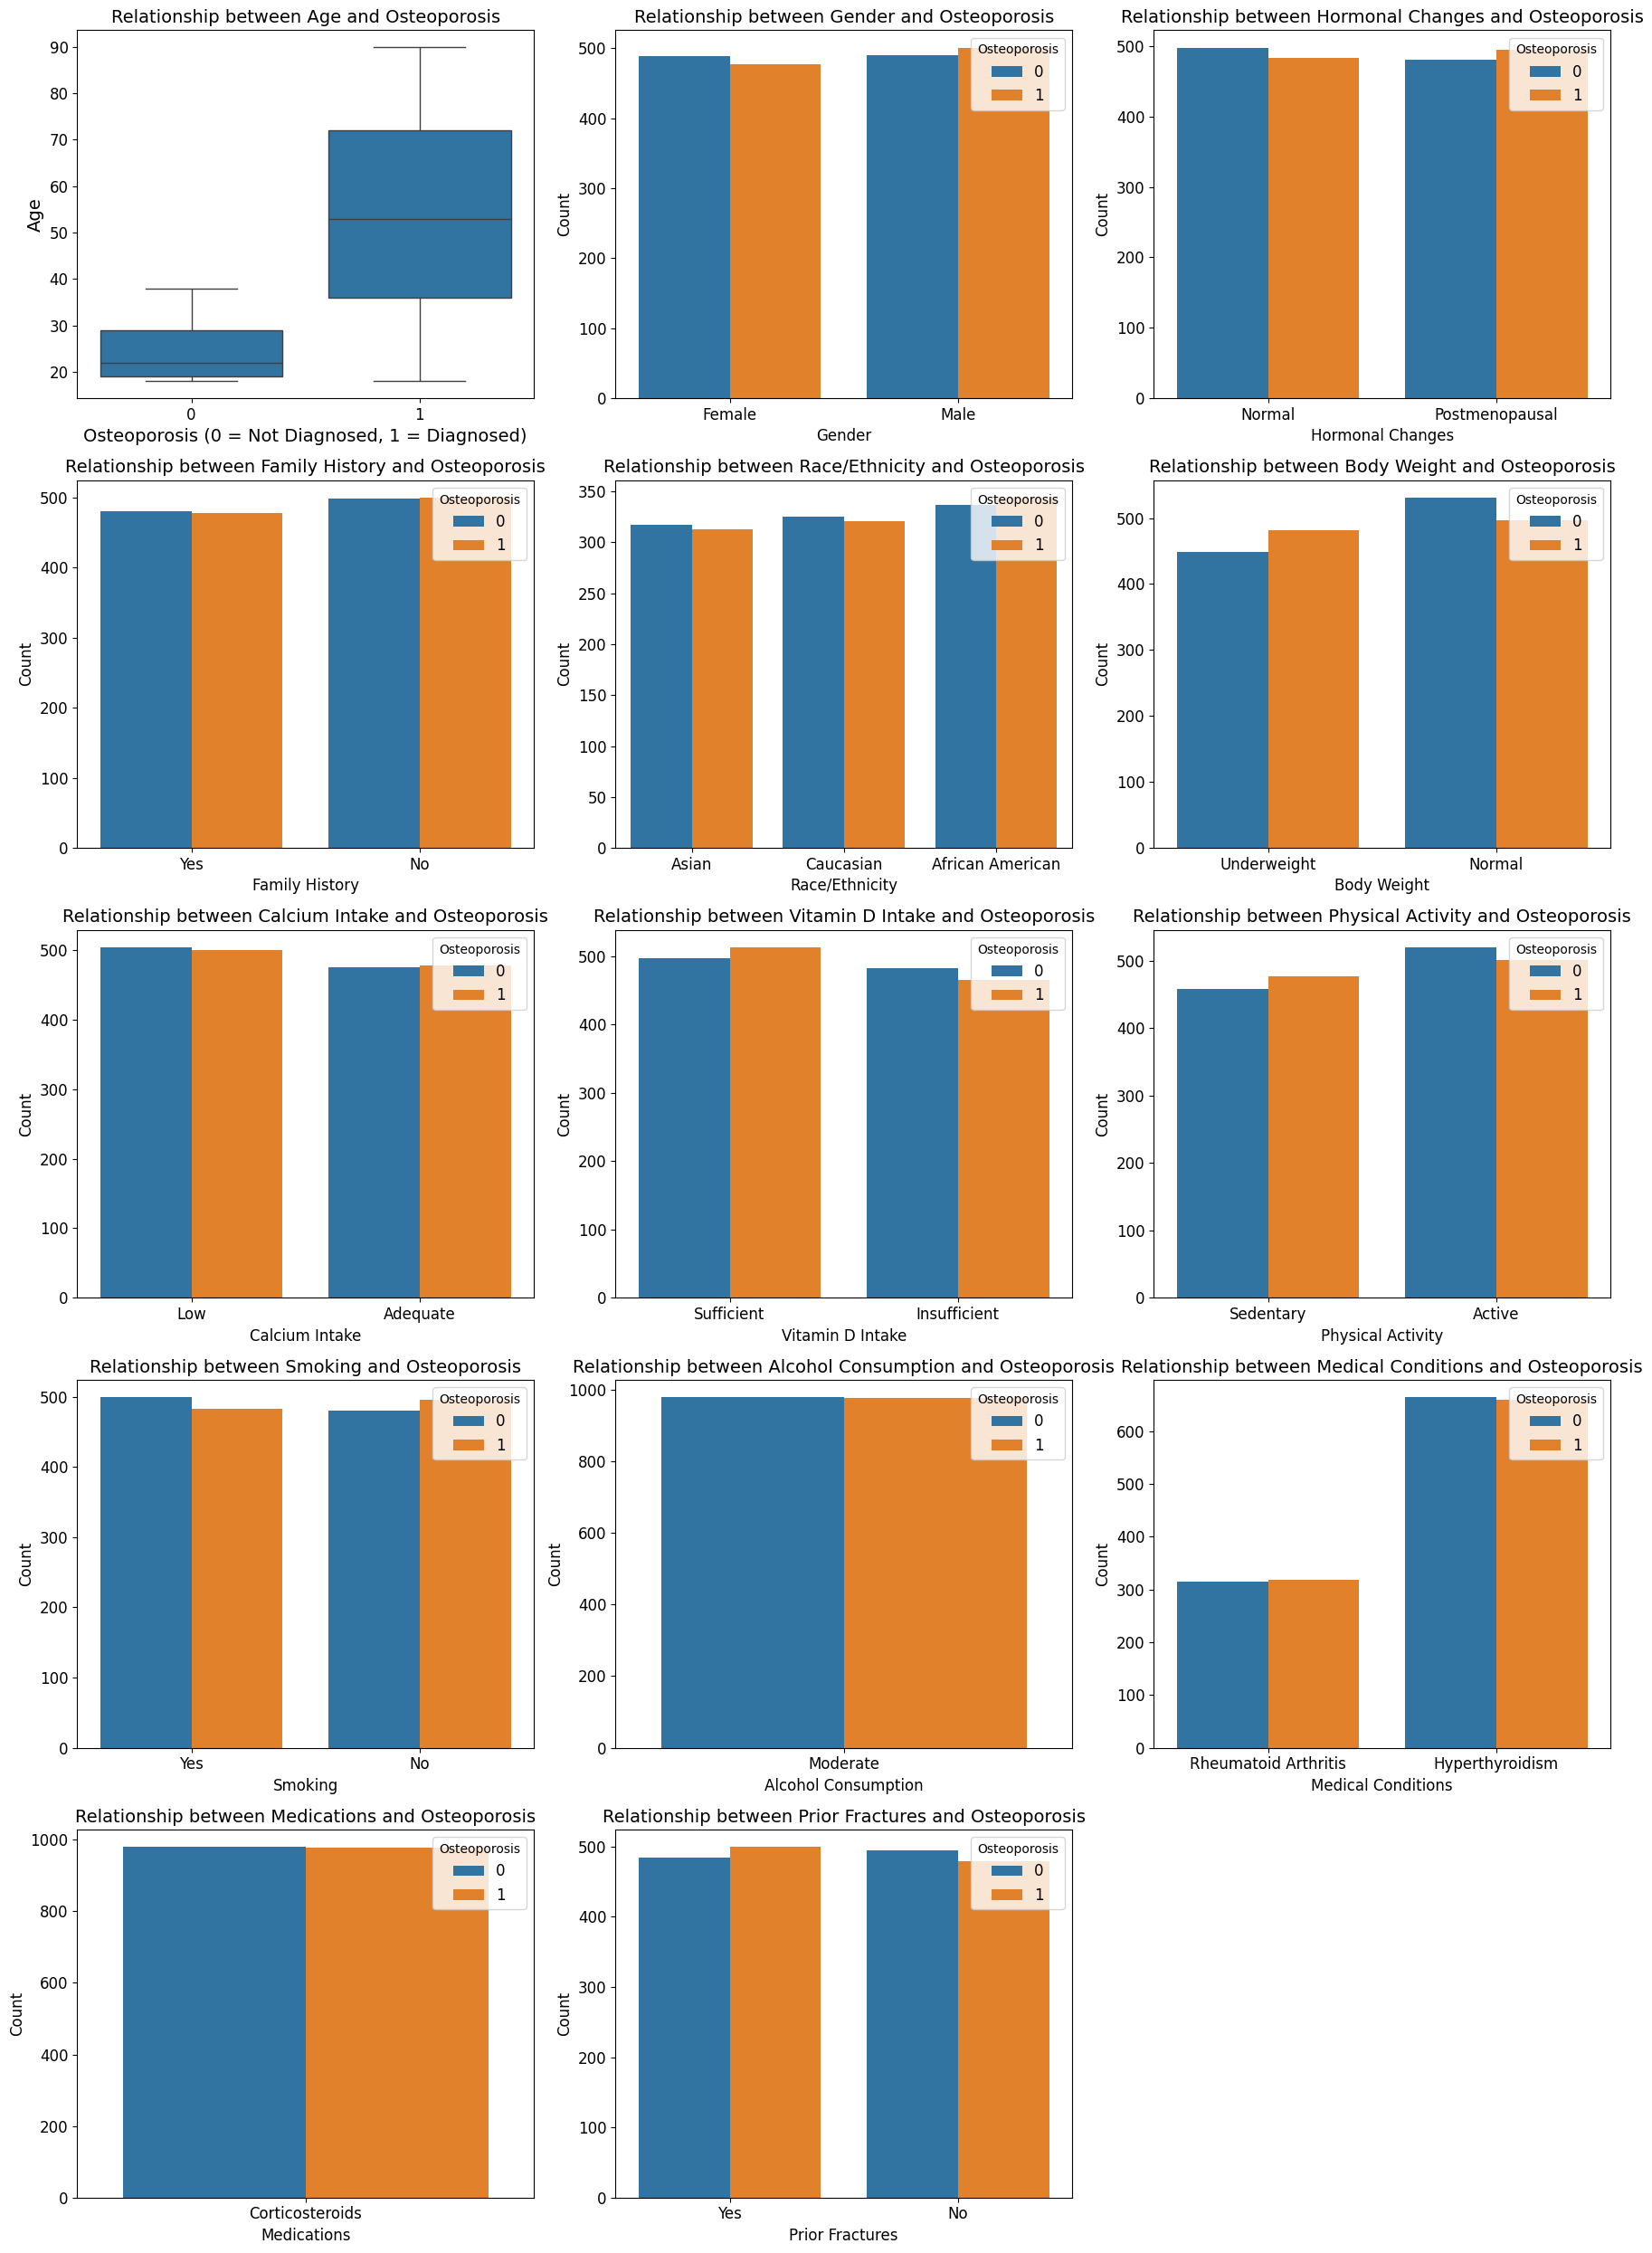

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Age']
categorical_columns = [
    'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
    'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity',
    'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures'
]

num_plots = len(numerical_columns) + len(categorical_columns)
cols = 3  
rows = (num_plots + cols - 1) // cols 

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x='Osteoporosis', y=column, data=data, ax=axes[i])
    axes[i].set_title(f"Relationship between {column} and Osteoporosis", fontsize=14)
    axes[i].set_xlabel("Osteoporosis (0 = Not Diagnosed, 1 = Diagnosed)", fontsize=14)
    axes[i].set_ylabel(column, fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)

for j, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='Osteoporosis', data=data, ax=axes[len(numerical_columns) + j])
    axes[len(numerical_columns) + j].set_title(f"Relationship between {column} and Osteoporosis", fontsize=14)
    axes[len(numerical_columns) + j].set_xlabel(column, fontsize=12)
    axes[len(numerical_columns) + j].set_ylabel("Count", fontsize=12)
    axes[len(numerical_columns) + j].legend(title="Osteoporosis", loc='upper right', fontsize=12)
    axes[len(numerical_columns) + j].tick_params(axis='both', labelsize=12)

for k in range(len(numerical_columns) + len(categorical_columns), len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()


**Analysis of the Plots**

The provided plots visualize the relationships between various features and the target variable (Osteoporosis).<br> Let’s analyze each feature and its potential impact:

**1. Age and Osteoporosis**  
- **Observation:**  
  Individuals diagnosed with osteoporosis are predominantly older, with a noticeable trend that risk increases with age.  
- **Interpretation:**  
  Age is a well-established risk factor for osteoporosis, reflecting the natural decline in bone density over time.  

<br>

**2. Gender and Osteoporosis**  
- **Observation:**  
  The dataset shows no significant difference in osteoporosis prevalence between males and females.  
- **Interpretation:**  
  Gender does not appear to play a significant role in influencing osteoporosis risk.  

<br>

**3. Hormonal Changes and Osteoporosis**  
- **Observation:**  
  Postmenopausal individuals demonstrate a slightly higher prevalence of osteoporosis compared to those with normal hormonal status.  
- **Interpretation:**  
  Hormonal changes, particularly estrogen deficiency post-menopause, are a recognized contributor to increased osteoporosis risk.  

<br>

**4. Family History and Osteoporosis**  
- **Observation:**  
  The data indicates no significant difference in osteoporosis diagnosis rates between those with and without a family history.  
- **Interpretation:**  
  Family history does not appear to be a substantial predictor of osteoporosis risk.  

<br>

**5. Race/Ethnicity and Osteoporosis**  
- **Observation:**  
  No significant differences in osteoporosis prevalence are observed across racial or ethnic groups.  
- **Interpretation:**  
  Race/ethnicity does not emerge as a notable factor influencing osteoporosis risk.  

<br>

**6. Body Weight and Osteoporosis**  
- **Observation:**  
  Underweight individuals show a higher prevalence of osteoporosis compared to those with normal weight.  
- **Interpretation:**  
  Lower body weight is a known risk factor due to reduced bone mass and fragility.  

<br>

**7. Calcium Intake and Osteoporosis**  
- **Observation:**  
  Individuals with low calcium intake have a slightly higher prevalence of osteoporosis compared to those with adequate intake.  
- **Interpretation:**  
  Calcium intake is critical for bone health, and its deficiency increases osteoporosis risk.  

<br>

**8. Vitamin D Intake and Osteoporosis**  
- **Observation:**  
  Insufficient Vitamin D intake correlates with a higher prevalence of osteoporosis.  
- **Interpretation:**  
  Vitamin D facilitates calcium absorption, and its deficiency contributes to increased osteoporosis risk.  

<br>

**9. Physical Activity and Osteoporosis**  
- **Observation:**  
  Sedentary individuals have a higher prevalence of osteoporosis compared to active individuals.  
- **Interpretation:**  
  Regular physical activity supports bone strength and reduces the risk of osteoporosis.  

<br>

**10. Smoking and Osteoporosis**  
- **Observation:**  
  No significant difference in osteoporosis prevalence is observed between smokers and non-smokers.  
- **Interpretation:**  
smoking does not appear as a significant factor in this dataset.  

<br>

**11. Alcohol Consumption and Osteoporosis**  
- **Observation:**  
  Moderate alcohol consumption shows no strong association with osteoporosis prevalence.  
- **Interpretation:**  
  Alcohol consumption does not emerge as a significant predictor of osteoporosis risk.  

<br>

**12. Medical Conditions and Osteoporosis**  
- **Observation:**  
  Medical conditions like rheumatoid arthritis are strongly associated with increased osteoporosis prevalence.  
- **Interpretation:**  
  Such conditions exacerbate bone loss and significantly increase osteoporosis risk.  

<br>

**13. Medications and Osteoporosis**  
- **Observation:**  
  Corticosteroid use shows a strong association with osteoporosis diagnoses.  
- **Interpretation:**  
  Corticosteroids negatively affect bone density, increasing fracture risk and osteoporosis prevalence.  

<br>

**14. Prior Fractures and Osteoporosis**  
- **Observation:**  
  Individuals with prior fractures are more likely to be diagnosed with osteoporosis.  
- **Interpretation:**  
  Prior fractures are indicative of bone fragility and serve as a direct marker for osteoporosis.  

**General Insights**  

- **Strong Predictors:**  
  Age, Body Weight, Hormonal Changes, and Prior Fractures.  

- **Moderate Predictors:**  
  Physical Activity, Calcium Intake, Vitamin D Intake, and Medical Conditions (e.g., rheumatoid arthritis).  

- **Weak Predictors:**  
  Family History, Gender, Race/Ethnicity, Smoking, Alcohol Consumption, and Medications (e.g., corticosteroids).  

### Step 5: Numerical Data Analysis

In this step, we will focus partly on numerical analysis of the data to understand its trends and relationships. This analysis includes:

- Correlation matrix:<br>
Understanding the trading power between numerical transactions.
- Distribution analysis:<br>
 Examining how values ​​are distributed according to numerical variation (normal, skewed, etc.).
- Outlier analysis:<br>
Using boxplots to identify values ​​that differ significantly from the rest of the data, which can be analyzed in the future.

#### - Correlation matrix

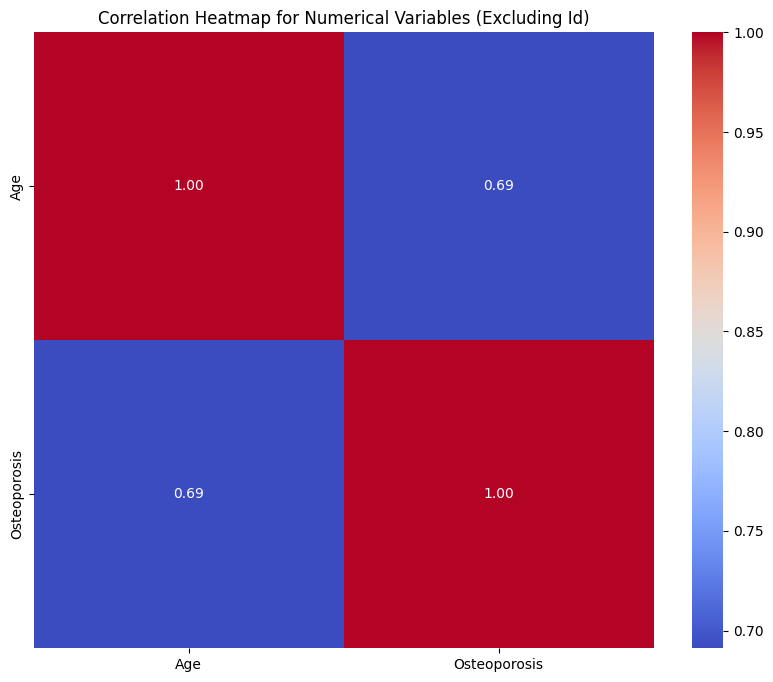

In [203]:
numerical_columns = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if col != 'Id']

corr_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Variables (Excluding Id)")
plt.show()


The correlation coefficient between age and Osteoporosis is **0.69**.<br>This indicates a strong positive relationship between age and osteoporosis, meaning that the older you are, the more likely you are to develop osteoporosis.

#### - Distribution analysis

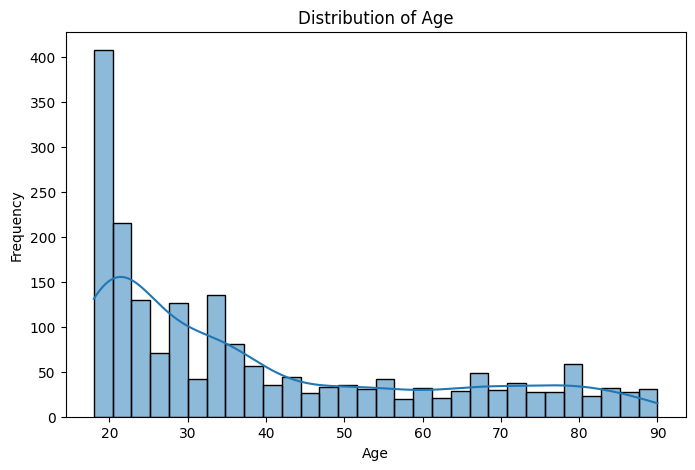

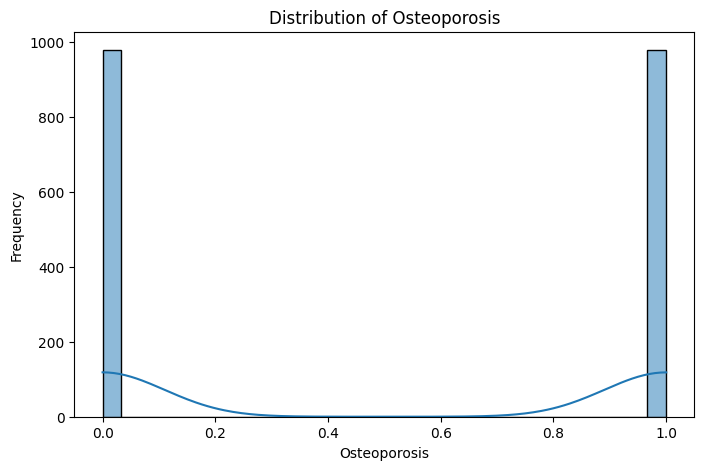

In [204]:
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

**Data Distribution Analysis**

1. **Age Distribution:**
- Notes:
The data show a high concentration of young ages (20-30 years).<br>
The distribution is right-skewed, meaning that there are few participants in older ages.<br>
There are significant gaps between middle ages (40-60) and older ages (70-90).<br>
- Interpretation:
The distribution is non-normal, which is expected since osteoporosis is more common in older people, and younger ages may be a reference sample.
2. **Osteoporosis Distribution:**
- Notes:
The distribution is binary, with the value either 0 (not affected) or 1 (affected).<br>
The total number of affected people appears to be lower than those without.<br>
- Interpretation:
The distribution reflects that the sample contains a larger number of participants who do not have osteoporosis, which may lead to class imbalance.

#### - Outlier analysis

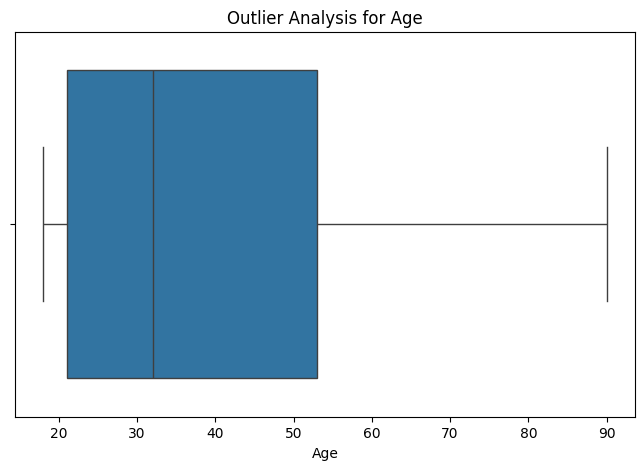

In [205]:

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Age'])
plt.title("Outlier Analysis for Age")
plt.xlabel("Age")
plt.show()

Data ranges from 20 to 90 years old, evenly distributed.<br>
There are no ages outside the normal range, making the data in this column reliable.

### -Duplicate rows

In [206]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


### Step 6: Categorical Columns Analysis

Let's delve deeper into the statistical relationship analysis between non-numeric columns and the target variable.

- Chi-Square test 

In [207]:
from scipy.stats import chi2_contingency

categorical_columns = [
    'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
    'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity',
    'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures'
]

for column in categorical_columns:
    contingency_table = pd.crosstab(data[column], data['Osteoporosis'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {column}:")
    print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")
    print("-" * 50)


Chi-Square Test for Gender:
Chi2 = 0.23, p-value = 0.6348
--------------------------------------------------
Chi-Square Test for Hormonal Changes:
Chi2 = 0.37, p-value = 0.5417
--------------------------------------------------
Chi-Square Test for Family History:
Chi2 = 0.00, p-value = 0.9456
--------------------------------------------------
Chi-Square Test for Race/Ethnicity:
Chi2 = 0.12, p-value = 0.9410
--------------------------------------------------
Chi-Square Test for Body Weight:
Chi2 = 2.30, p-value = 0.1297
--------------------------------------------------
Chi-Square Test for Calcium Intake:
Chi2 = 0.01, p-value = 0.9104
--------------------------------------------------
Chi-Square Test for Vitamin D Intake:
Chi2 = 0.49, p-value = 0.4828
--------------------------------------------------
Chi-Square Test for Physical Activity:
Chi2 = 0.63, p-value = 0.4290
--------------------------------------------------
Chi-Square Test for Smoking:
Chi2 = 0.43, p-value = 0.5122
---------

**Chi-Square Test Results Analysis**

- **Chi-Square Test** evaluates whether a statistically significant relationship exists between a categorical variable (such as gender or physical activity) and the target variable (**Osteoporosis**).  
- **p-value**: A p-value less than **0.05** indicates a statistically significant relationship.

**Column Analysis Based on p-value**

1. **Significant Columns (p-value < 0.05):**  
- No columns showed a statistically significant relationship with osteoporosis in this dataset.  

2. **Non-Significant Columns (p-value ≥ 0.05):**  
- All tested categorical variables, including **Gender**, **Hormonal Changes**, **Family History**, **Race/Ethnicity**, **Body Weight**, **Calcium Intake**, **Vitamin D Intake**, **Physical Activity**, **Smoking**, and others, yielded p-values greater than 0.05. This indicates no significant statistical relationship with osteoporosis.  
  - **Examples:**  
    - **Gender**: p-value = 0.6348  
    - **Hormonal Changes**: p-value = 0.5417  
    - **Family History**: p-value = 0.9456  
    - **Race/Ethnicity**: p-value = 0.9410  
    - **Body Weight**: p-value = 0.1297  
    - **Calcium Intake**: p-value = 0.9104  
    - **Vitamin D Intake**: p-value = 0.4828  
    - **Physical Activity**: p-value = 0.4290  

**Interpretation:**  

1. **Significant Columns for Causal Analysis:**  
- None of the categorical variables demonstrated statistical significance, indicating they are not strong predictors of osteoporosis in this dataset.  

2. **Non-Significant Columns:**  
- The results suggest that none of the tested variables had a meaningful statistical association with osteoporosis.

### Step 7: Check data balance

Distribution of Osteoporosis:
Osteoporosis
0    50.025549
1    49.974451
Name: proportion, dtype: float64


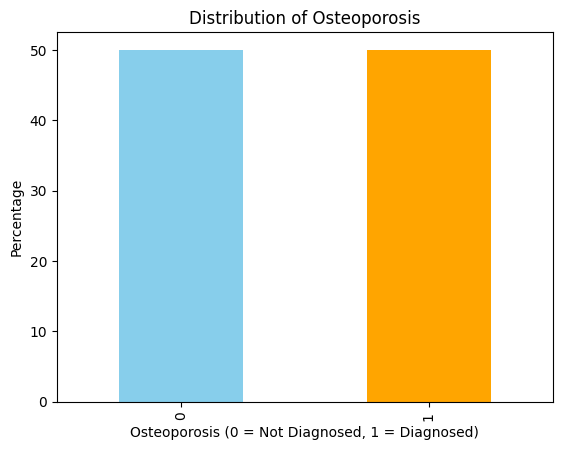

In [208]:

distribution = data['Osteoporosis'].value_counts(normalize=True) * 100

print("Distribution of Osteoporosis:")
print(distribution)

import matplotlib.pyplot as plt
distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Distribution of Osteoporosis")
plt.ylabel("Percentage")
plt.xlabel("Osteoporosis (0 = Not Diagnosed, 1 = Diagnosed)")
plt.show()


### Step 8: Causal analysis

#### Causal Diagram (DAG)

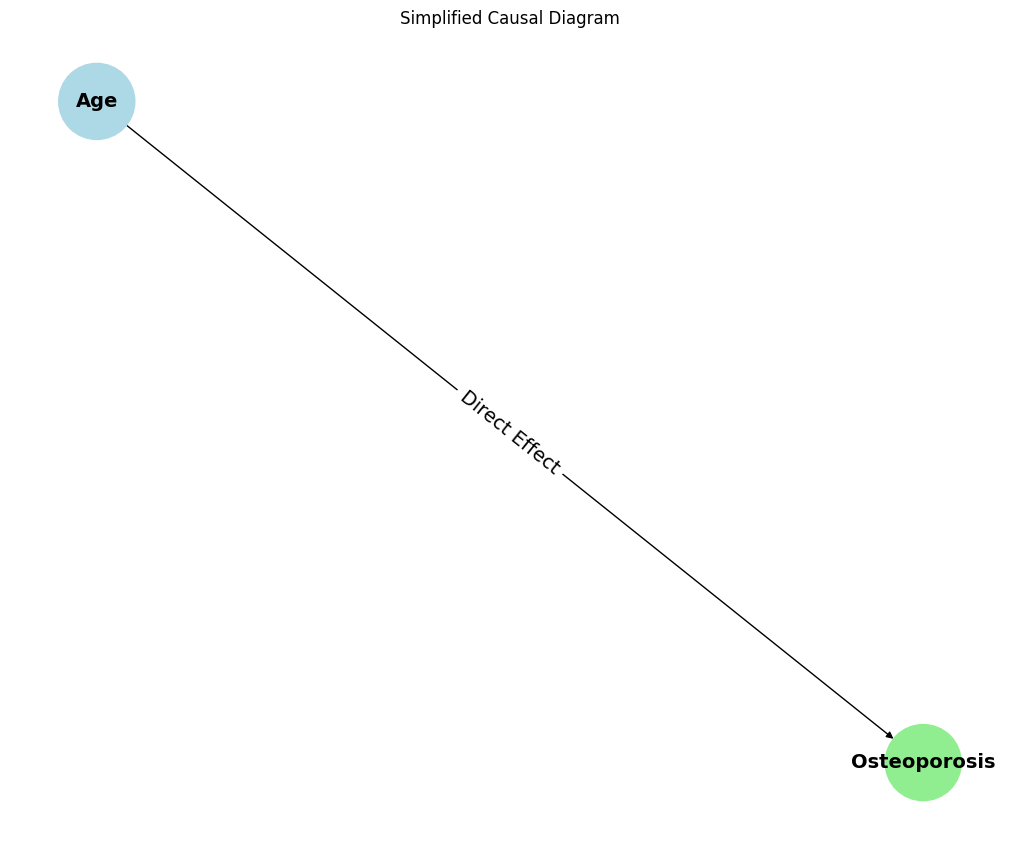

In [212]:
# Simplified Causal Diagram
G = nx.DiGraph()
G.add_node("Age", color="lightblue", size=3000)
G.add_node("Osteoporosis", color="lightgreen", size=3000)

G.add_edge("Age", "Osteoporosis", label="Direct Effect")

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=[3000, 3000], node_color=["lightblue", "lightgreen"], font_size=14, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, "label"), font_size=14)
plt.title("Simplified Causal Diagram")
plt.show()



**Age → Osteoporosis**  
- Represents a direct causal relationship.  
- This highlights that age is the primary factor influencing osteoporosis, consistent with biological evidence of declining bone density with age.  

#### Analyzing Interaction Effects Between Age and Key Variables

**Purpose:**<br>
To evaluate if combining **age** with other key factors (e.g., physical activity, calcium intake) reveals stronger relationships with osteoporosis.

**Method:**
1. Created interaction terms (e.g., `Age_PhysicalActivity`).
2. Applied Chi-Square tests to identify statistically significant interactions (p < 0.05).

In [210]:
from itertools import product
from scipy.stats import chi2_contingency

categorical_columns = ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
    'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity',
    'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures'
]

new_interaction_columns = []
for col in categorical_columns:
  
    if data[col].isnull().any():
        print(f"Warning: Missing values found in {col}, consider imputing them.")
    new_col_name = f"Age_{col.replace(' ', '')}"
    data[new_col_name] = data['Age'] * data[col].astype('category').cat.codes
    new_interaction_columns.append(new_col_name)

significant_interactions = []
print("Running Chi-Square Tests for Interactions:\n")
for column in new_interaction_columns:
    contingency_table = pd.crosstab(data[column] > data[column].mean(), data['Osteoporosis'])
    try:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square Test for {column}:")
        print(f"  Chi2 = {chi2:.2f}, p-value = {p:.4f}")
        if p < 0.05:
            significant_interactions.append(column)
    except ValueError as e:
        print(f"  Error processing {column}: {e}")

print("\nSignificant Interactions:")
for interaction in significant_interactions:
    print(f"- {interaction}")


Running Chi-Square Tests for Interactions:

Chi-Square Test for Age_Gender:
  Chi2 = 33.29, p-value = 0.0000
Chi-Square Test for Age_HormonalChanges:
  Chi2 = 29.70, p-value = 0.0000
Chi-Square Test for Age_FamilyHistory:
  Chi2 = 4.45, p-value = 0.0350
Chi-Square Test for Age_Race/Ethnicity:
  Chi2 = 117.21, p-value = 0.0000
Chi-Square Test for Age_BodyWeight:
  Chi2 = 13.08, p-value = 0.0003
Chi-Square Test for Age_CalciumIntake:
  Chi2 = 51.43, p-value = 0.0000
Chi-Square Test for Age_VitaminDIntake:
  Chi2 = 71.40, p-value = 0.0000
Chi-Square Test for Age_PhysicalActivity:
  Chi2 = 7.81, p-value = 0.0052
Chi-Square Test for Age_Smoking:
  Chi2 = 20.25, p-value = 0.0000
Chi-Square Test for Age_AlcoholConsumption:
  Chi2 = 0.00, p-value = 1.0000
Chi-Square Test for Age_MedicalConditions:
  Chi2 = 0.01, p-value = 0.9106
Chi-Square Test for Age_Medications:
  Chi2 = 0.00, p-value = 1.0000
Chi-Square Test for Age_PriorFractures:
  Chi2 = 31.85, p-value = 0.0000

Significant Interactions

**Handling Numeric and Categorical Variable Interactions**

To address the inconsistency between the numeric variable (`Age`) and categorical variables, I transformed categorical variables into numeric representations using `.astype('category').cat.codes`. This conversion assigns unique numeric codes to each category.

Next, interaction columns were created by multiplying the numeric `Age` variable with the encoded categorical variables. These interaction columns allow us to examine how age interacts with different categories (e.g., `Physical Activity`, `Smoking`) and their combined effect on osteoporosis.

Finally,I performed Chi-Square tests on these interaction columns to identify statistically significant relationships with osteoporosis, ensuring compatibility between numeric and categorical data.


**Chi-Square Test Results**

**Significant Interactions (p-value < 0.05):**
1. **Age_Gender:** Gender differences in osteoporosis risk increase with age.  
2. **Age_HormonalChanges:** Postmenopausal changes significantly elevate age-related osteoporosis risk.  
3. **Age_FamilyHistory:** A family history moderately interacts with age in influencing risk.  
4. **Age_Race/Ethnicity:** Osteoporosis risk varies with age across racial/ethnic groups.  
5. **Age_BodyWeight:** Underweight older individuals are at higher risk.  
6. **Age_CalciumIntake:** Low calcium intake worsens age-related osteoporosis risk.  
7. **Age_VitaminDIntake:** Insufficient vitamin D exacerbates osteoporosis in older adults.  
8. **Age_PhysicalActivity:** Sedentary lifestyles significantly increase age-related risk.  
9. **Age_Smoking:** Smoking compounds osteoporosis risk with age.  
10. **Age_PriorFractures:** Prior fractures strongly indicate bone fragility in older individuals.

**Non-Significant Interactions (p-value ≥ 0.05):**
- Age-related interactions with alcohol consumption, medical conditions, and medications were not statistically significant.


#### Final Causal Diagram with Interactions

The diagram integrates interaction effects between `Age` and key lifestyle/nutritional factors (`Physical Activity`, `Vitamin D Intake`, `Calcium Intake`, `Body Weight`,`Smoking`,`Prior Fractures`,`Family History`,`Hormonal Changes`,`Race/Ethnicity`, `Osteoporosis`) and their impact on osteoporosis.

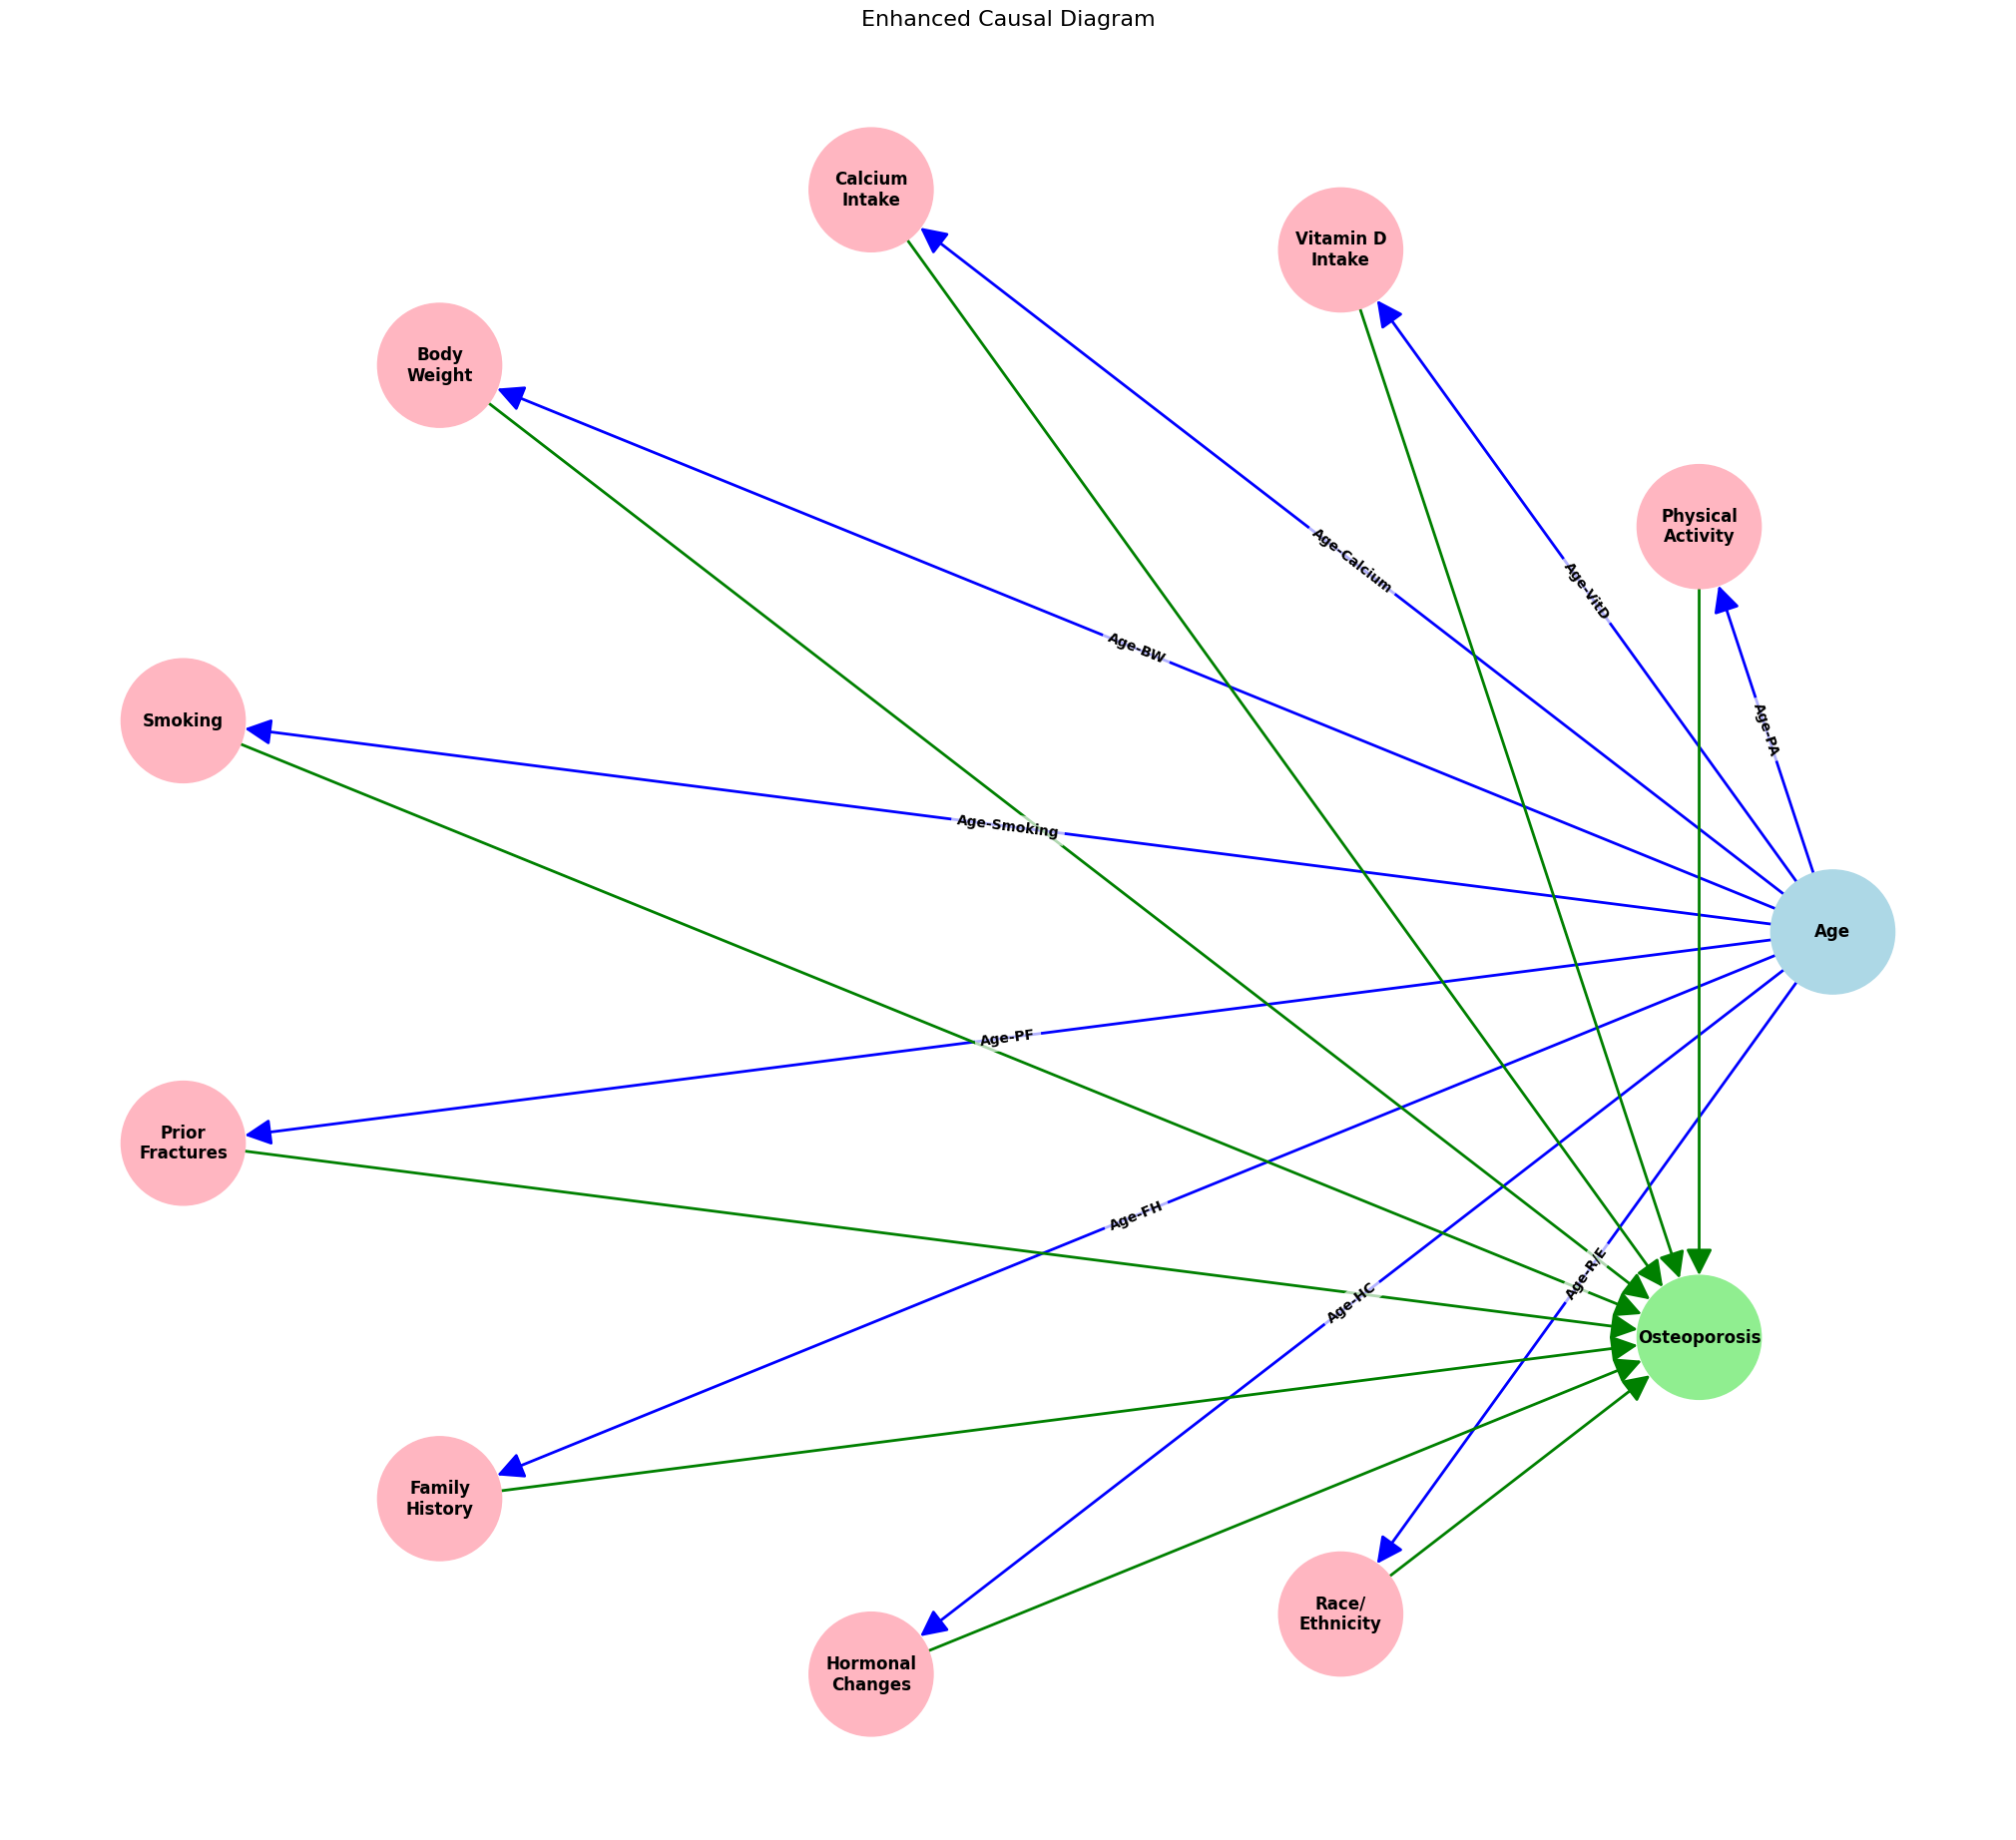

In [244]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_node('Age', color='#ADD8E6', label='Age')
G.add_node('Physical Activity', color='#FFB6C1', label='Physical\nActivity')
G.add_node('Vitamin D Intake', color='#FFB6C1', label='Vitamin D\nIntake')
G.add_node('Calcium Intake', color='#FFB6C1', label='Calcium\nIntake')
G.add_node('Body Weight', color='#FFB6C1', label='Body\nWeight')
G.add_node('Smoking', color='#FFB6C1', label='Smoking')
G.add_node('Prior Fractures', color='#FFB6C1', label='Prior\nFractures')
G.add_node('Family History', color='#FFB6C1', label='Family\nHistory')
G.add_node('Hormonal Changes', color='#FFB6C1', label='Hormonal\nChanges')
G.add_node('Race/Ethnicity', color='#FFB6C1', label='Race/\nEthnicity')
G.add_node('Osteoporosis', color='#90EE90', label='Osteoporosis')


edges = [
    ('Age', 'Physical Activity', 'Age-PA', 'blue'),
    ('Physical Activity', 'Osteoporosis', '', 'green'),
    ('Age', 'Vitamin D Intake', 'Age-VitD', 'blue'),
    ('Vitamin D Intake', 'Osteoporosis', '', 'green'),
    ('Age', 'Calcium Intake', 'Age-Calcium', 'blue'),
    ('Calcium Intake', 'Osteoporosis', '', 'green'),
    ('Age', 'Body Weight', 'Age-BW', 'blue'),
    ('Body Weight', 'Osteoporosis', '', 'green'),
    ('Age', 'Smoking', 'Age-Smoking', 'blue'),
    ('Smoking', 'Osteoporosis', '', 'green'),
    ('Age', 'Prior Fractures', 'Age-PF', 'blue'),
    ('Prior Fractures', 'Osteoporosis', '', 'green'),
    ('Age', 'Family History', 'Age-FH', 'blue'),
    ('Family History', 'Osteoporosis', '', 'green'), 
    ('Age', 'Hormonal Changes', 'Age-HC', 'blue'),
    ('Hormonal Changes', 'Osteoporosis', '', 'green'),  
    ('Age', 'Race/Ethnicity', 'Age-R/E', 'blue'),
    ('Race/Ethnicity', 'Osteoporosis', '', 'green'),
]

for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2], color=edge[3])

pos = nx.circular_layout(G)

node_colors = [G.nodes[node].get('color', '#ADD8E6') for node in G.nodes]
node_labels = nx.get_node_attributes(G, 'label')
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
edge_labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(20, 18))
nx.draw(
    G, pos, labels=node_labels, with_labels=True, node_size=8000,
    node_color=node_colors, font_size=12, font_weight="bold", font_color="black",
    edge_color=edge_colors, arrowsize=40, width=2
)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels, font_color='black', font_size=10, font_weight="bold", bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)
)
plt.title("Enhanced Causal Diagram", fontsize=16)
plt.show()


**Interpretation of the Enhanced Causal Diagram:**  

1. **Age**: The central factor directly influencing osteoporosis and interacting with key variables.  

2. **Key Factors**:  
   - **Physical Activity, Vitamin D, and Calcium Intake**: Positively impact bone health, with effects amplified by age.  
   - **Body Weight**: Underweight individuals face higher risks, especially as they age.  
   - **Smoking and Prior Fractures**: Age intensifies their detrimental effects on bone health.  
   - **Race/Ethnicity, Hormonal Changes, and Family History**: Show limited direct influence on osteoporosis.  

### Insights:  
Age mediates the impact of lifestyle factors, emphasizing the need for age-targeted prevention strategies focused on activity, nutrition, and smoking cessation.  

### Conclusion:  
The diagram underscores age’s central role in osteoporosis risk, highlighting modifiable factors for targeted intervention in older populations.